## CS226 Project

### visualization 

Dataset can be downloaded from here: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load 1,000,000 rows
data = pd.read_csv("../data/US_Accidents_March23.csv", nrows=1000000)
print(data.shape)

(1000000, 46)


In [4]:
data.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1000000.000000,1000000.000000,1000000.000000,0.0,0.0,1000000.000000,984702.000000,539411.000000,983447.000000,987624.000000,981069.000000,899602.000000,524684.000000
mean,2.320200,36.059323,-94.753951,NaN,NaN,0.167486,64.619012,59.439159,66.026522,29.693616,9.173668,7.767917,0.013259
std,0.548478,4.906870,17.391816,NaN,NaN,1.427785,17.450734,21.930704,21.890455,0.792132,2.259461,5.408117,0.203154
min,1.000000,24.554800,-124.497414,NaN,NaN,0.000000,-77.800000,-50.000000,1.000000,0.120000,0.000000,0.000000,0.000000
25%,2.000000,32.925510,-117.370224,NaN,NaN,0.000000,54.000000,43.000000,50.000000,29.560000,10.000000,4.600000,0.000000
50%,2.000000,35.258339,-87.957626,NaN,NaN,0.000000,66.900000,64.000000,68.000000,29.910000,10.000000,7.000000,0.000000
75%,3.000000,40.113201,-80.919167,NaN,NaN,0.010000,77.000000,76.000000,84.000000,30.050000,10.000000,10.400000,0.000000
max,4.000000,48.998085,-68.160789,NaN,NaN,336.570007,196.000000,196.000000,100.000000,58.100000,111.000000,822.800000,36.470000


In [6]:
keep_cols = data.columns
print(data.columns)
drop_columns = [7,8]
new_data = data.drop(data.columns[drop_columns], axis=1)
min_detail = [7,8] + list(range(18,46))
min_detail_data = data.drop(data.columns[min_detail],axis=1)
print(new_data.columns)
print(min_detail_data.columns)

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')
Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperatur

object :
['ID' 'Source' 'Start_Time' 'End_Time' 'Description' 'Street' 'City'
 'County' 'State' 'Zipcode' 'Country' 'Timezone' 'Airport_Code'
 'Weather_Timestamp' 'Wind_Direction' 'Weather_Condition' 'Sunrise_Sunset'
 'Civil_Twilight' 'Nautical_Twilight' 'Astronomical_Twilight']
int64 :
['Severity']
bool :
['Amenity' 'Bump' 'Crossing' 'Give_Way' 'Junction' 'No_Exit' 'Railway'
 'Roundabout' 'Station' 'Stop' 'Traffic_Calming' 'Traffic_Signal'
 'Turning_Loop']
float64 :
['Start_Lat' 'Start_Lng' 'End_Lat' 'End_Lng' 'Distance(mi)'
 'Temperature(F)' 'Wind_Chill(F)' 'Humidity(%)' 'Pressure(in)'
 'Visibility(mi)' 'Wind_Speed(mph)' 'Precipitation(in)']


<Axes: ylabel='count'>

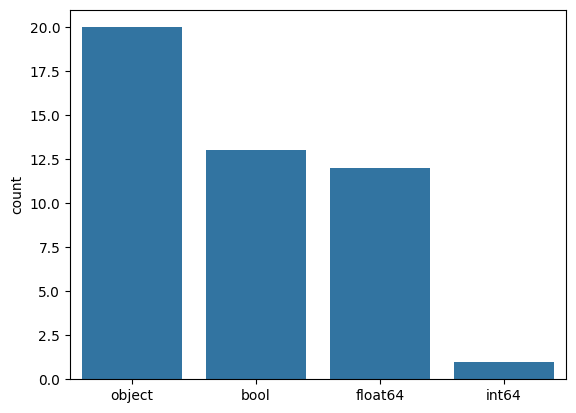

In [7]:
data_types = data.dtypes
col_datatypes = set(data_types)
for col_type in col_datatypes: 
    print(col_type, ":")
    print(np.array(data.columns)[data_types == col_type])

data_types.value_counts()
fig = plt.figure() 
sns.barplot(data_types.value_counts())

In [8]:
min_detail_data.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern


In [11]:
print(min_detail_data.shape)
print(min_detail_data.loc[min_detail_data.isna().any(axis=1), :].shape)
min_detail_data.loc[min_detail_data.isna().any(axis=1), :].head(n=8)


(1000000, 16)
(2192, 16)


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone
7794,A-7795,Source2,2,2016-12-19 21:50:18,2016-12-19 22:20:02,37.885376,-122.516586,0.01,#1 lane blocked due to accident on US-101 Nort...,US-101 N,Southeast Marin,Marin,CA,NaN,US,NaN
13889,A-13890,Source2,2,2016-10-27 18:35:03,2016-10-27 19:04:40,37.885376,-122.516586,0.01,#2 lane blocked due to accident on US-101 Nort...,US-101 N,Southeast Marin,Marin,CA,NaN,US,NaN
14515,A-14516,Source2,2,2016-11-01 20:55:51,2016-11-01 21:25:29,37.885376,-122.516586,0.01,#2 lane blocked due to accident on US-101 Nort...,US-101 N,Southeast Marin,Marin,CA,NaN,US,NaN
16208,A-16209,Source2,2,2016-11-10 16:14:07,2016-11-10 16:43:44,37.885376,-122.516586,0.01,Right hand shoulder blocked due to accident on...,US-101 N,Southeast Marin,Marin,CA,NaN,US,NaN
23539,A-23540,Source2,2,2016-10-07 09:21:49,2016-10-07 09:50:47,37.505482,-122.119301,0.00,Lane blocked due to accident on CA-84 Westboun...,Dumbarton Bridge,San Mateo,San Mateo,CA,NaN,US,NaN
31135,A-31136,Source2,2,2016-03-23 00:09:11,2016-03-23 00:39:11,37.885376,-122.516586,0.01,Accident on US-101 Northbound at Exit 446 Redw...,US-101 N,Southeast Marin,Marin,CA,NaN,US,NaN
34200,A-34201,Source2,2,2016-04-11 20:06:40,2016-04-11 20:53:00,37.885376,-122.516586,0.01,Accident on US-101 Northbound near Exit 446 Re...,US-101 N,Southeast Marin,Marin,CA,NaN,US,NaN
85968,A-85975,Source2,2,2016-08-02 18:18:02,2016-08-02 19:03:02,34.451862,-117.660103,0.00,Slow traffic due to accident on 263rd St near ...,263rd St E,NaN,Los Angeles,CA,92372,US,US/Pacific


In [44]:
print(new_data.shape)
print(new_data.loc[new_data.isna().any(axis=1), :].shape)
new_data.loc[new_data.isna().any(axis=1), :].head(n=8)

(1000000, 44)
(523820, 44)


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,...,False,False,False,False,True,False,Day,Day,Day,Day
6,A-7,Source2,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,0.00,Accident on Oakridge Dr at Woodward Ave. Expec...,N Woodward Ave,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,Source2,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,0.01,Accident on I-75 Southbound at Exit 54B Grand ...,N Main St,...,False,False,False,False,False,False,Day,Day,Day,Day
8,A-9,Source2,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,0.00,Accident on Notre Dame Ave at Warner Ave. Expe...,Notre Dame Ave,...,False,False,False,False,False,False,Day,Day,Day,Day


In [45]:
new_min_data = min_detail_data.dropna()
print(new_min_data.shape)

new_data2 = new_data.dropna() 
print(new_data.shape)

(997808, 16)
(1000000, 44)


(1000, 4)


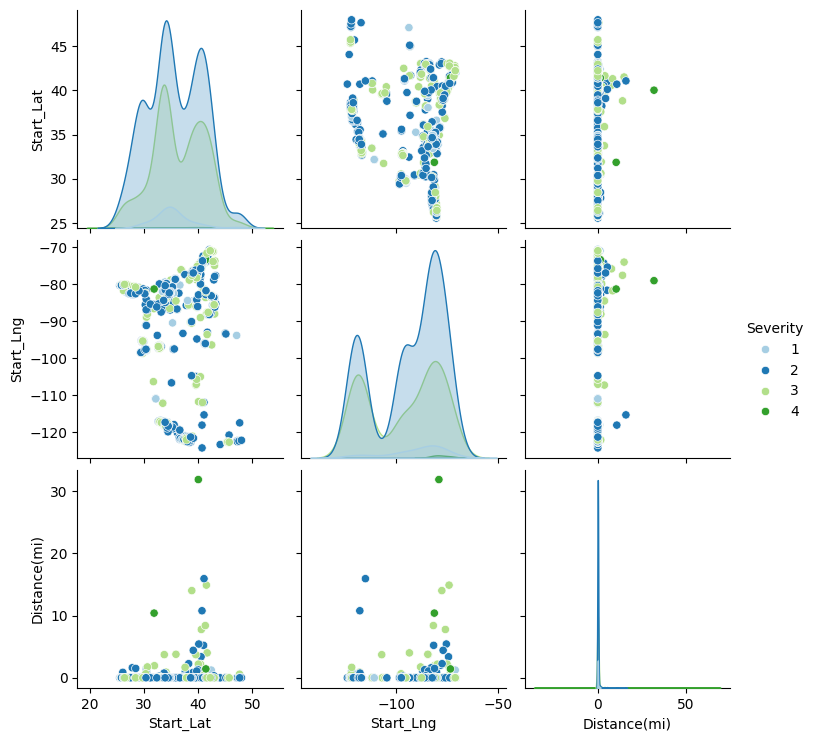

In [46]:
float_data = new_min_data
# Subsample 1000 rows
subsample = float_data.sample(n=1000, random_state=42)  # You can adjust the random_state for reproducibility

# Select columns with datatype float64
float_columns = subsample.select_dtypes(include=['float64','int'])
print(float_columns.shape)

sns.pairplot(float_columns, hue="Severity", kind = "scatter", palette="Paired")

(1000, 11)


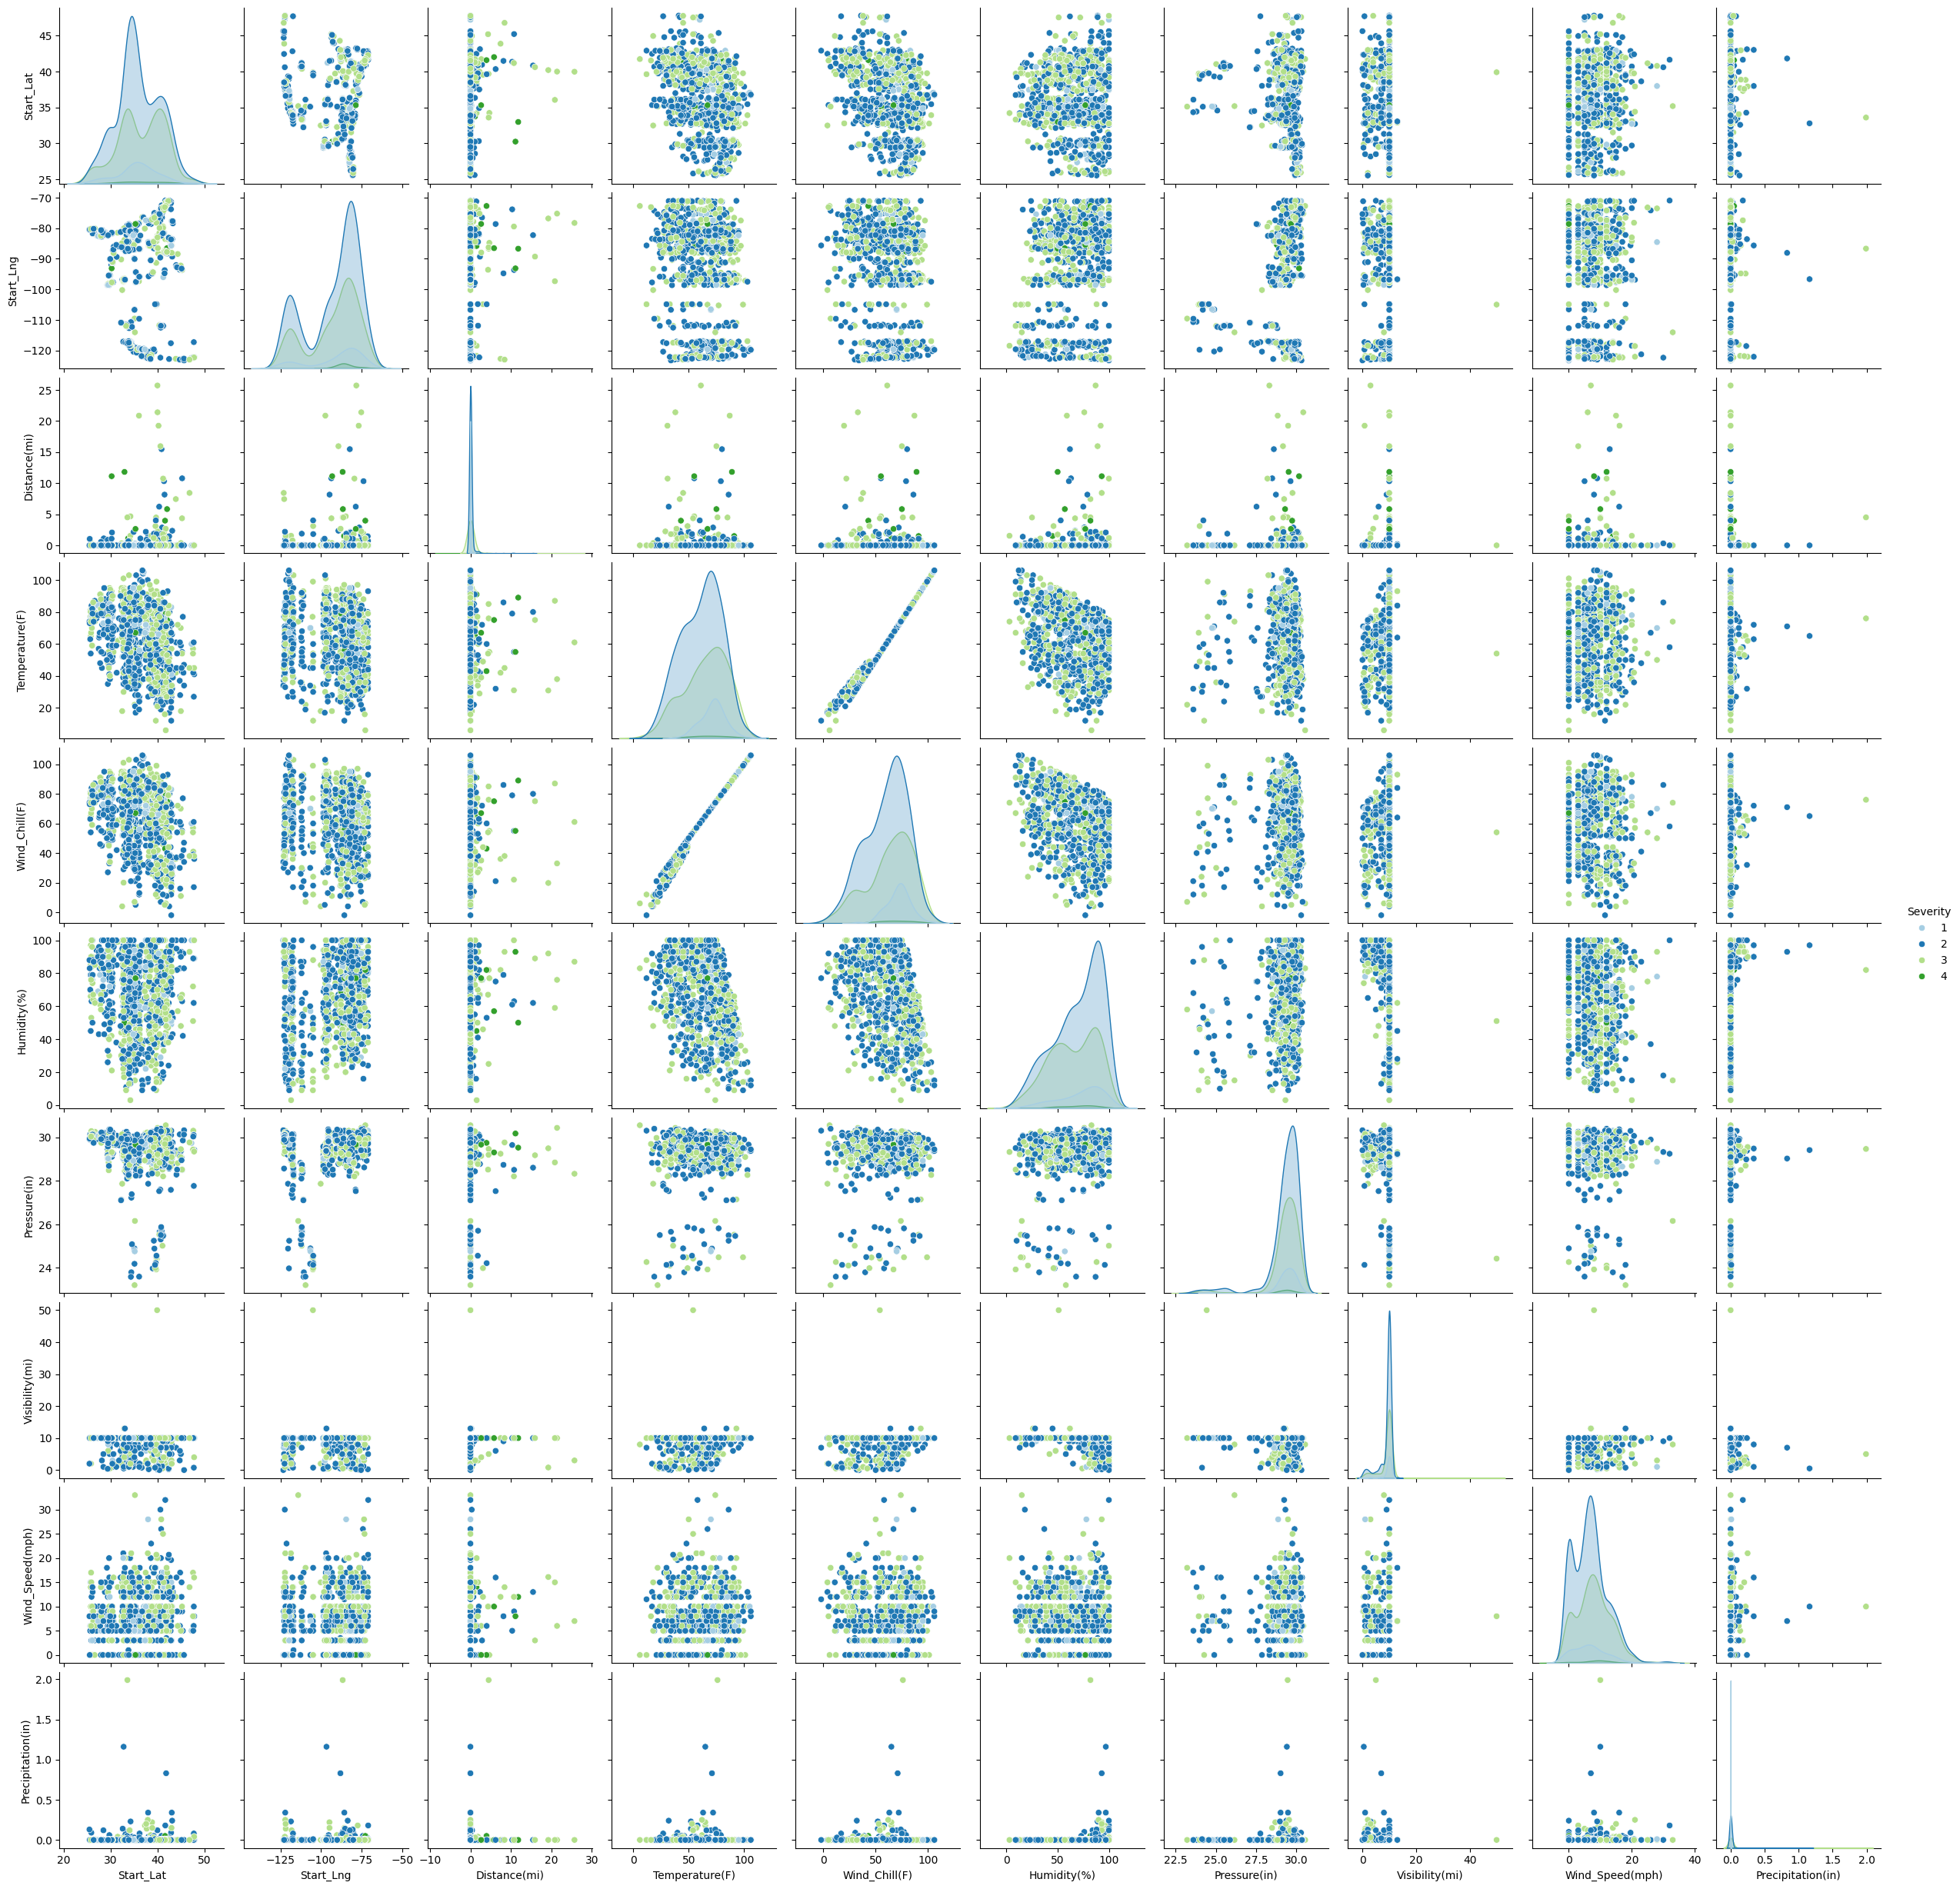

In [47]:
float_data = new_data2
# Subsample 1000 rows
subsample = float_data.sample(n=1000, random_state=42)  # You can adjust the random_state for reproducibility

# Select columns with datatype float64
float_columns = subsample.select_dtypes(include=['float64','int'])
print(float_columns.shape)

sns.pairplot(float_columns, hue="Severity", kind = "scatter", palette="Paired")